Neural Networks Version

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


Find Missing values

In [3]:
missing_values = data.isnull().sum
print(data.isnull().sum().to_markdown(numalign="left", stralign="left"))


|             | 0   |
|:------------|:----|
| footfall    | 0   |
| tempMode    | 0   |
| AQ          | 0   |
| USS         | 0   |
| CS          | 0   |
| VOC         | 0   |
| RP          | 0   |
| IP          | 0   |
| Temperature | 0   |
| fail        | 0   |


There is no missing values

<Axes: >

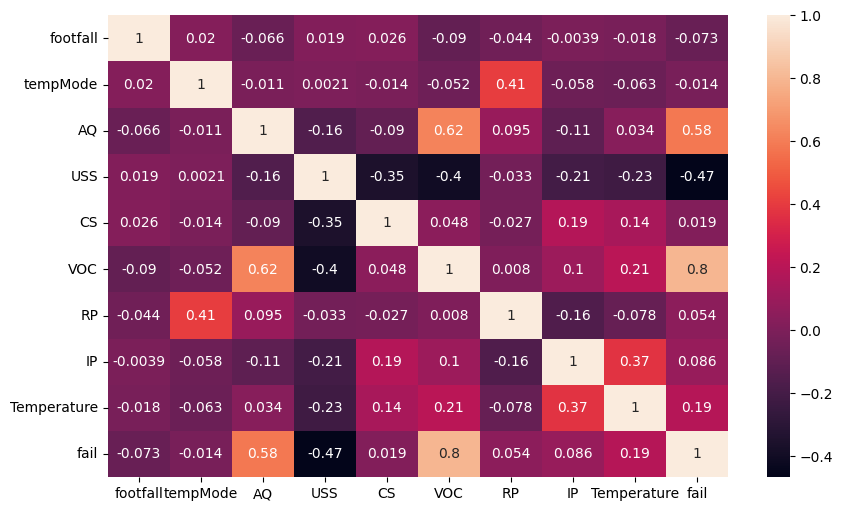

In [4]:
#correlation matrix
%matplotlib inline

cor = data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)

According to the correlation matrix, the best feature is AQ, VOC, Temperature

so were gonna use these features to predict the target

index 2,5,8

In [5]:
final_data = data[['AQ', 'VOC', 'fail']]

final_data.head()

,AQ,VOC,fail
0,7,6,1
1,3,1,0
2,2,1,0
3,3,1,0
4,5,0,0


train test split and convert the data to numpy array

In [6]:
# x train y train x test y test

x = final_data.drop('fail', axis=1).values

y = final_data['fail'].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Building the Neural Network

In [7]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# ealry stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='loss')

model.fit(x_train, y_train, epochs=300, callbacks=[early_stopping])

Epoch 1/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2566 - accuracy: 0.9086
Epoch 2/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.9099
Epoch 3/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.9113
Epoch 4/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2553 - accuracy: 0.9113
Epoch 5/300
24/24 [==============================] - 0s 6ms/step - loss: 0.2556 - accuracy: 0.9113
Epoch 6/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.9113
Epoch 7/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.9113
Epoch 8/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2559 - accuracy: 0.9099
Epoch 9/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2548 - accuracy: 0.9113
Epoch 10/300
24/24 [==============================] - 0s 5ms/step - loss: 0.2551 - accuracy: 0.9139
Epoch 11/

In [11]:
# test the model

model.evaluate(x_test, y_test)

# predict

predictions = model.predict(x_test)

predictions = [1 if i > 0.5 else 0 for i in predictions]

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

# save the model

model.save("model.h5")




6/6 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       102
           1       0.86      0.91      0.88        87

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189

[[89 13]
 [ 8 79]]
